In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
df = df.iloc[:,3:]

In [18]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
import matplotlib.pyplot as plt

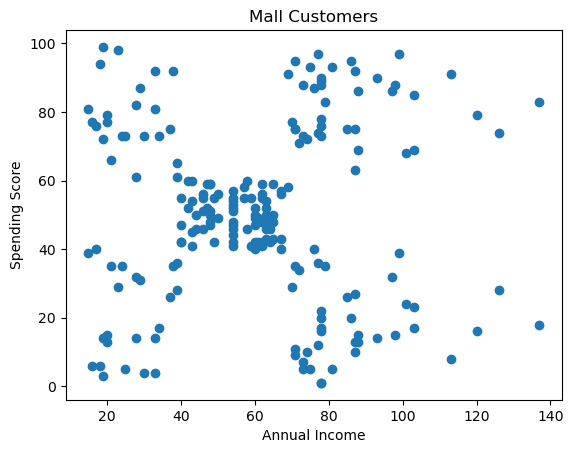

In [20]:
plt.title("Mall Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

In [13]:
from sklearn.cluster import AgglomerativeClustering, KMeans

In [32]:
sse = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(df)
    sse.append(kmeans.inertia_)
sse

C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25018.576334776335,
 21850.165282585636,
 19664.685196005543,
 17508.970577400072,
 15838.717785514084,
 14286.824449325184,
 13166.51403228769,
 12273.744868581709]

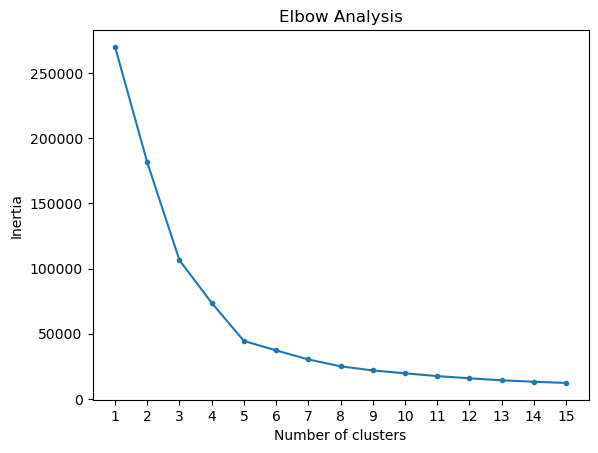

In [33]:
plt.title("Elbow Analysis")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker=".")

In [31]:
# Silhouette score method
from sklearn.metrics import silhouette_score

In [34]:
ss = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(df)
    ss.append(silhouette_score(df,label))
ss

C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5321706886465517,
 0.4572211842776841,
 0.45770857148861777,
 0.4448793494619179,
 0.449266209291611,
 0.44393627692473414,
 0.41044761226755966,
 0.4198021680737565,
 0.42274276827999885]

<BarContainer object of 14 artists>

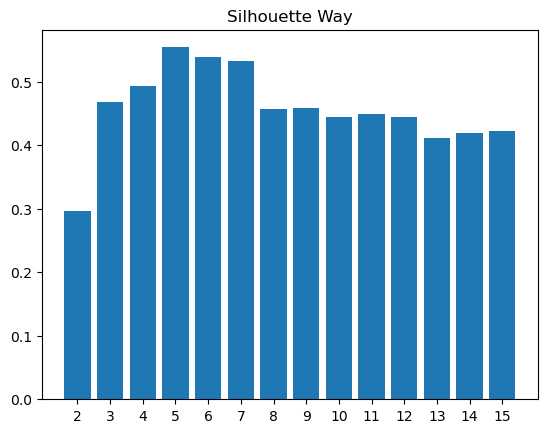

In [36]:
plt.title("Silhouette Way")
plt.xticks(range(2,16))
plt.bar(range(2,16), ss)

In [53]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(df)

C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sunandan\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
ag = AgglomerativeClustering(n_clusters=5)
labels2 = ag.fit_predict(df)
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

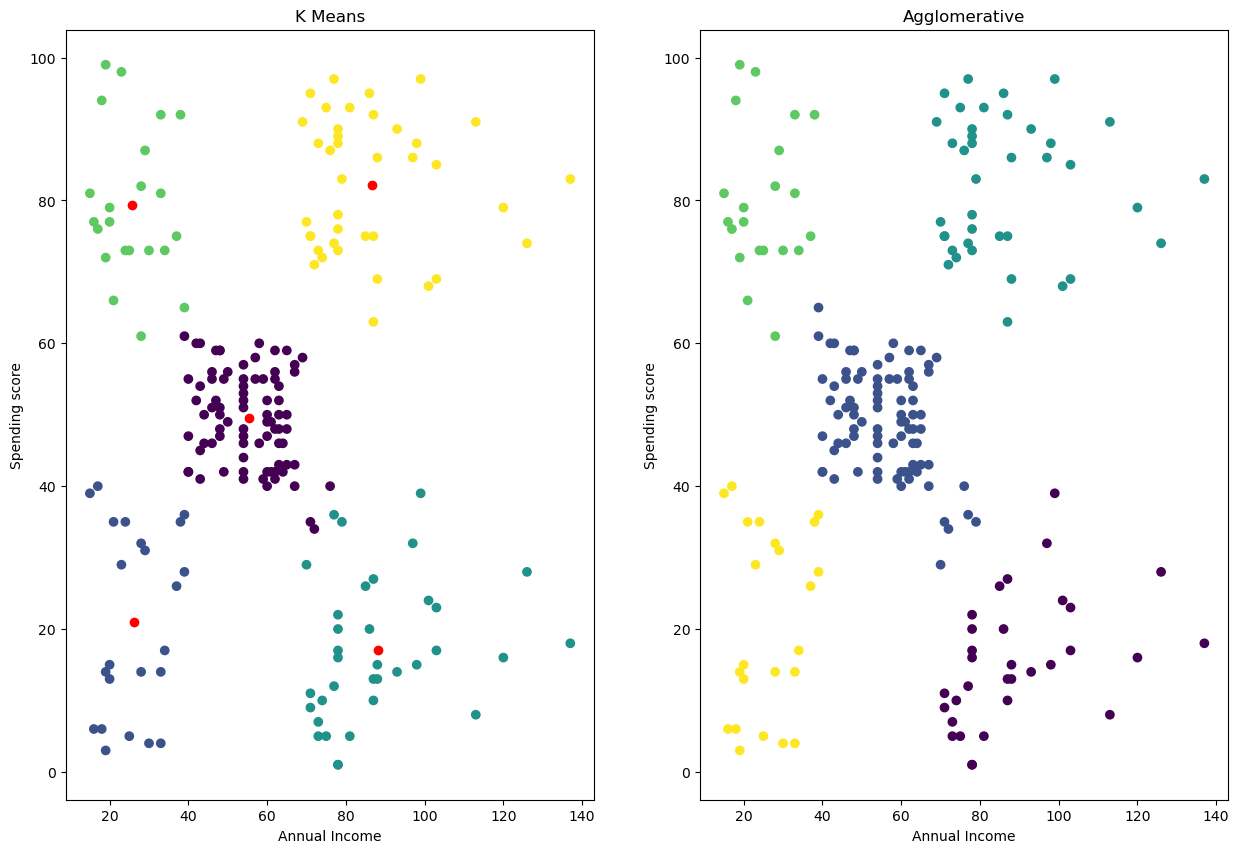

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("K Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="Red")

plt.subplot(1,2,2)
plt.title("Agglomerative")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels2)